In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A gambler enters a casion with $10, and he wants to accumulate his wealth to $80 by betting $1 on red on each spin of the roulette wheel.
# The probability that the outcome of each round is red is 18/37.

successProbability = 18/37
initialCapital = 10
targetCapital = 80

In [3]:
gamblersWealth = initialCapital
gamblersWealthPath = []
gamblersWealthPath.append(gamblersWealth)

while gamblersWealth > 0 and gamblersWealth < targetCapital:
    
    outcomeRound = np.random.choice([-1, 1],p=[1-successProbability,successProbability])
    
    gamblersWealth = gamblersWealth + outcomeRound

    gamblersWealthPath.append(gamblersWealth)

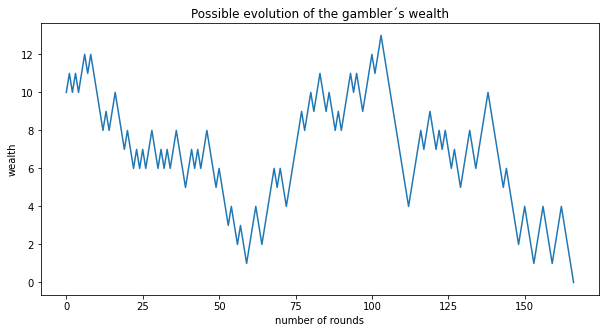

In [4]:
plt.figure(figsize=(10,5))
plt.plot(gamblersWealthPath)
plt.xlabel('number of rounds')
plt.ylabel('wealth')
plt.title('Possible evolution of the gambler´s wealth')
plt.show()

In [5]:
# Define the simulator function to sample a path

def samplePath(initial, target, p):
    
    gamblersWealth = initial
    gamblersWealthPath = []
    gamblersWealthPath.append(gamblersWealth)

    while gamblersWealth > 0 and gamblersWealth < target:
        
        unifromSample = np.random.uniform(0,1)
        
        if unifromSample < p:
            
            gamblersWealth = gamblersWealth + 1
            
        else:
            
            gamblersWealth = gamblersWealth - 1
        
        gamblersWealthPath.append(gamblersWealth)
        
    return gamblersWealthPath

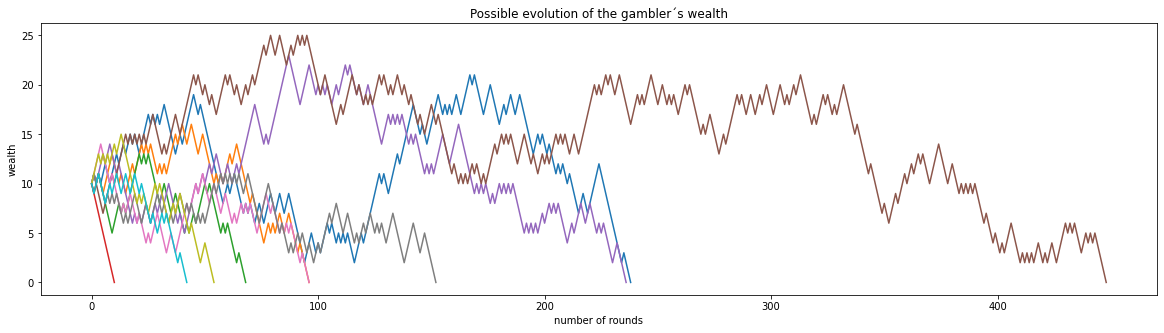

In [6]:
# Simulate more paths 

plt.figure(figsize=(20,5))
plt.xlabel('number of rounds')
plt.ylabel('wealth')
plt.title('Possible evolution of the gambler´s wealth')

numberOfSimulations = 10

for i in range(numberOfSimulations):
    plt.plot(samplePath(initialCapital,targetCapital,successProbability))
plt.show()

In [7]:
# Monte Carlo Simulation

numberOfSimulations = 1000

countRuinEvents = 0

for i in range(numberOfSimulations):
    sample = samplePath(initialCapital,targetCapital,successProbability)
    
    if sample[len(sample)-1] == 0:
        countRuinEvents = countRuinEvents + 1

In [8]:
countRuinEvents

986

In [9]:
countRuinEvents/numberOfSimulations

0.986

In [10]:
# Check the convergence of the estimated value (Strong Law of Large Numbers)

sampleStepSizes = np.ones(60) * 1000

countRuinEvents = np.zeros(len(sampleStepSizes))

k = 0

for sampleSize in sampleStepSizes:
    
    for i in range(int(sampleSize)):
        
        sample = samplePath(initialCapital,targetCapital,successProbability)
    
        if sample[len(sample)-1] == 0:
            
            countRuinEvents[k] = countRuinEvents[k] + 1
    
    k = k + 1

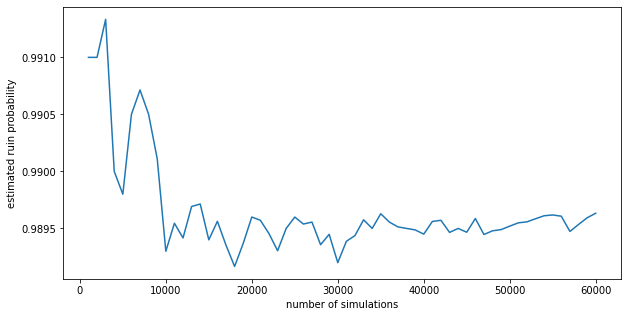

In [11]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(sampleStepSizes),np.cumsum(countRuinEvents)/np.cumsum(sampleStepSizes))
plt.xlabel('number of simulations')
plt.ylabel('estimated ruin probability')
plt.show()

In [12]:
# Check with the exact ruin probability as a function of the initial capital

def exactRuinProbability(initCap, targetCap, sucessProb):
    
    if sucessProb != 0.5: 
        
        return ( ((1-sucessProb)/sucessProb)**initCap - ((1-sucessProb)/sucessProb)**targetCap ) / (1 - ((1-sucessProb)/sucessProb)**targetCap)
    
    else:  
        
        return ( 1 - initCap/targetCap )
    

In [13]:
trueValue = exactRuinProbability(initialCapital,targetCapital,successProbability)
trueValue

0.990385819236669

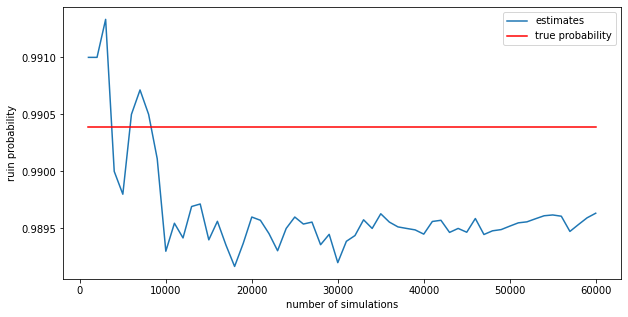

In [14]:
plt.figure(figsize=(10,5))
plt.xlabel('number of simulations')
plt.ylabel('ruin probability')
plt.plot(np.cumsum(sampleStepSizes),np.cumsum(countRuinEvents)/np.cumsum(sampleStepSizes),label="estimates")
plt.plot(np.cumsum(sampleStepSizes),np.repeat(trueValue,len(np.cumsum(sampleStepSizes))),color='red',label="true probability")

plt.legend()
plt.show()